In [12]:
%matplotlib inline
import math
import time
import numpy as np
import matplotlib.pyplot as plt
import random


In [13]:
def normal(data, mu, sigma):
    y_noise = [y_ + random.gauss(mu, sigma) for y_ in data]
    std_y = y_noise - data
    return np.array(y_noise), std_y


def get_data(nodes, mu, var, sub, func):
    x = np.arange(0.0, sub, sub / nodes)
    y = np.array([func(x_) for x_ in x])
    y_noise, sub_y = normal(y, mu, var)
    return x, y, y_noise, sub_y

In [14]:
nodes = 50
mu = 0
var = 0.02


def p_1(x_):
    return np.sin(x_ ** 2 + 1)



In [15]:
def gaussian(x, mu, var):
    # return (1 / (np.sqrt(2 * np.pi * var))) * np.exp(-(((x - mu) ** 2) / (2 * var)))
    return np.exp(-((x - mu) ** 2 / (2 * var)))


def sigmoid(x, mu, var):
    return 1 / (1 + np.exp(-(x - mu) / np.sqrt(var)))


def mle_mine(m, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    w_ = np.linalg.inv(X.T @ X) @ X.T @ Y
    return w_, X


# it is full bayesian and in predictive part, will use sequential learning
def full_bayesian_mine(m, alpha, x, Y, var, func, sub_range):
    sub_mu = sub_range / m
    X = np.array([[func(x_, sub_mu * i, var) for i in range(m)] for x_ in x])
    X[:, 0] = 1
    # Y = Y.reshape(1, -1)
    ss = np.linalg.inv((X.T @ X / var + alpha * np.identity(m)))
    w_ = ss @ X.T @ Y * (1 / var)
    return w_, X, ss


def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [16]:
m = 10
alpha = 0.5
x, y_origin, y_noise, _ = get_data(nodes, mu, var, 1.0, p_1)

w_, X = mle_mine(m, x, y_noise, var, gaussian, 1.0)
y_ = X @ w_
err = squared_loss(y_, y_noise)
print(err.sum())

0.00898143917276528


In [17]:
def display(m, alpha, beta, x, y_, y_origin, y_noise, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha},bate={beta}')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


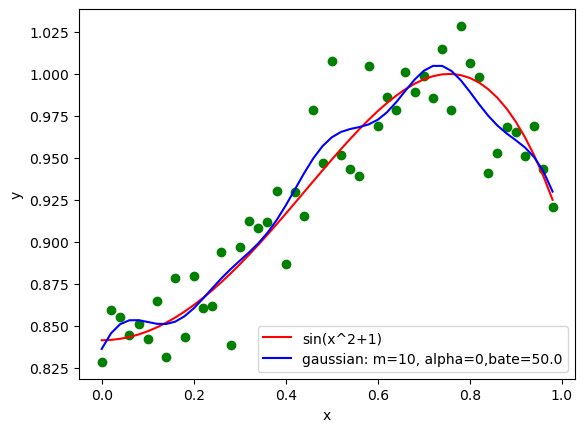

w:  [ 0.59686659  0.65919142 -1.2399753   2.11868675 -2.55005069  3.08115558
 -2.79158147  2.50180291 -1.43887494  0.80635493]


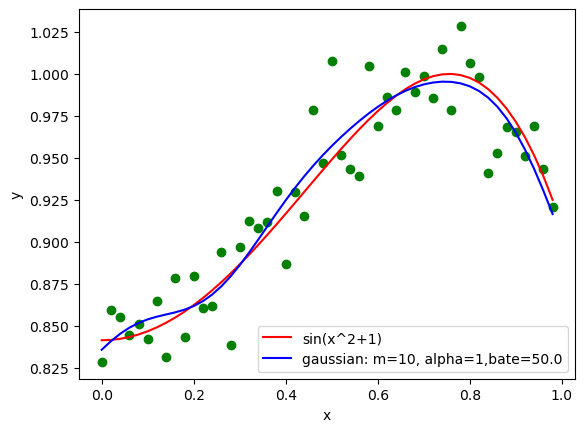

w:  [ 0.7787964   0.08528564 -0.03781138  0.0294887   0.07396559  0.02845748
  0.0572135   0.10003036 -0.00181747  0.14417035]


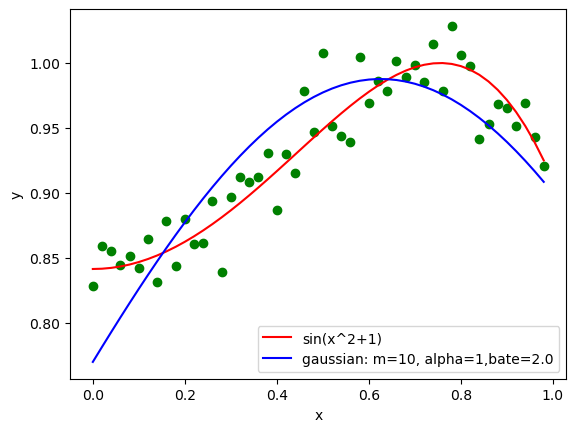

w:  [0.24129946 0.04666044 0.04575684 0.0499598  0.05968757 0.0747204
 0.09419217 0.11667326 0.1403338  0.16316217]


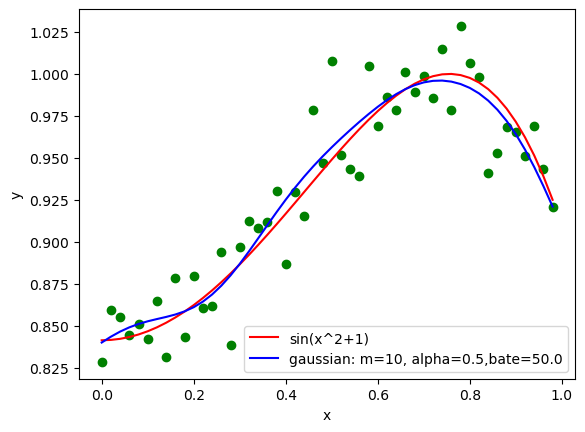

w:  [ 0.80040241  0.05993738 -0.02649042  0.01328568  0.07196191  0.02772506
  0.032795    0.11647223 -0.01710084  0.1300925 ]


In [18]:
params = [(0.02, 0), (0.02, 1), (0.5, 1), (0.02, 0.5)]

for var_el, al in params:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)



3. 
Alpha is the variance of Gaussian a priori, and beta is the variance of Gaussian likelihood. The Alpha/beta Ratio Describes The Way To fit The Curve. The larger the alpha/beta ratio, the worse the fit. The smaller the alpha/beta ratio, the better the fit.

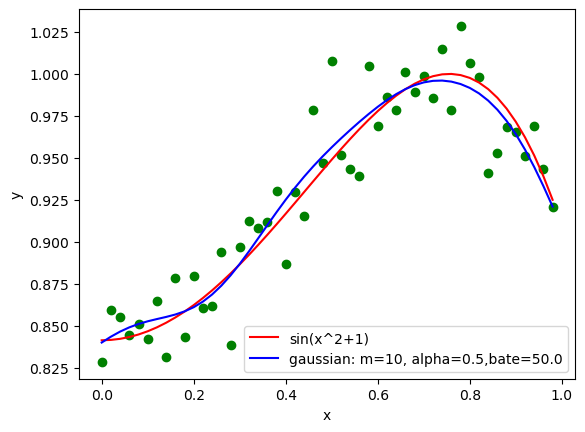

w:  [ 0.80040241  0.05993738 -0.02649042  0.01328568  0.07196191  0.02772506
  0.032795    0.11647223 -0.01710084  0.1300925 ]


In [19]:
param = [(0.02, 0.5)]
for var_el, al in param:
    w_, X, _ = full_bayesian_mine(m, al, x, y_noise, var_el, gaussian, 1.0)
    y_ = X @ w_
    display(m, al, 1 / var_el, x, y_, y_origin, y_noise, 'gaussian', 'sin(x^2+1)')
    print("w: ", w_)

5.
During the training phase, p(w | t) provides uncertainty information to describe the certainty of predicting w.

In the test phase, p(t_new | t) = p(t_new | w) * p(w | t) provides uncertainty information and describes the certainty of the predicted t_new.

All in all, the probability information provided by p(w | t) can help us choose more deterministic prediction results to make better decisions.

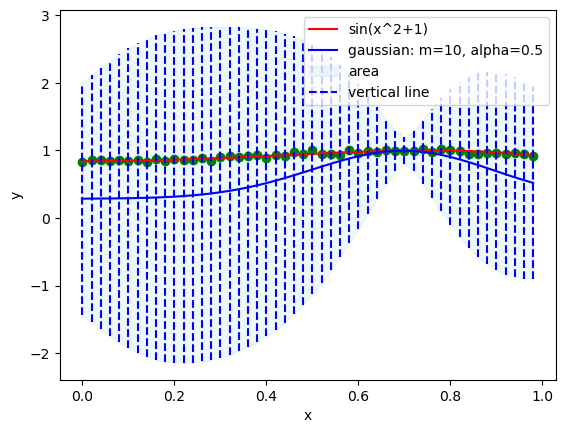

[35]
1


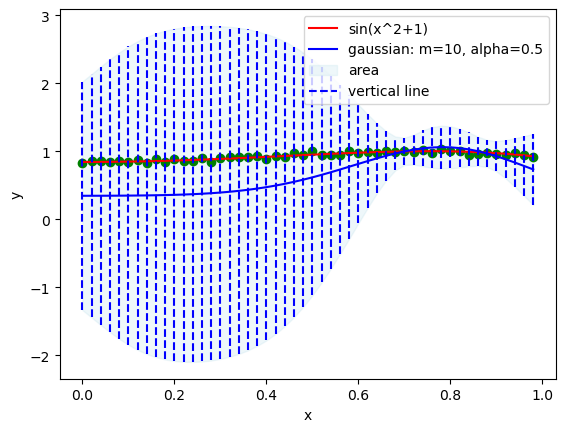

[35, 44]
2


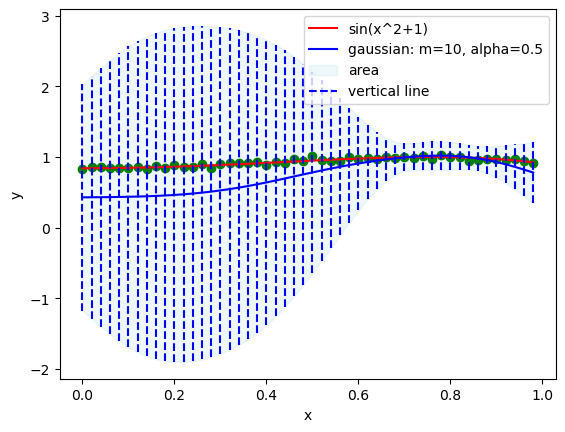

[35, 44, 41]
3


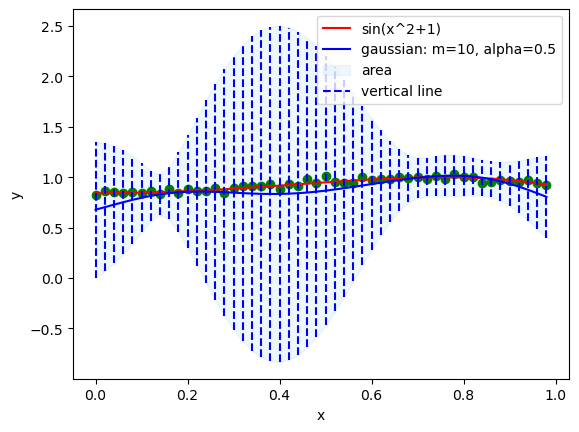

[35, 44, 41, 7]
4


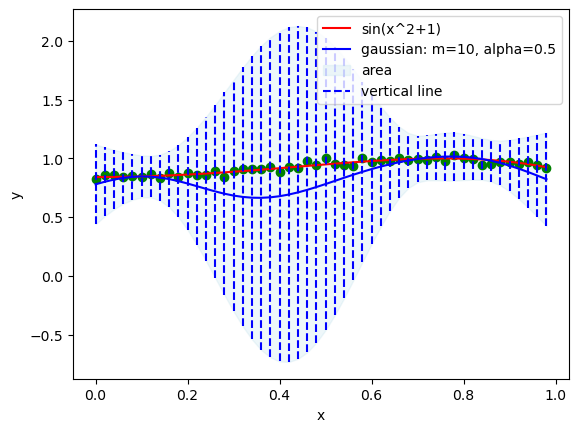

[35, 44, 41, 7, 4]
5


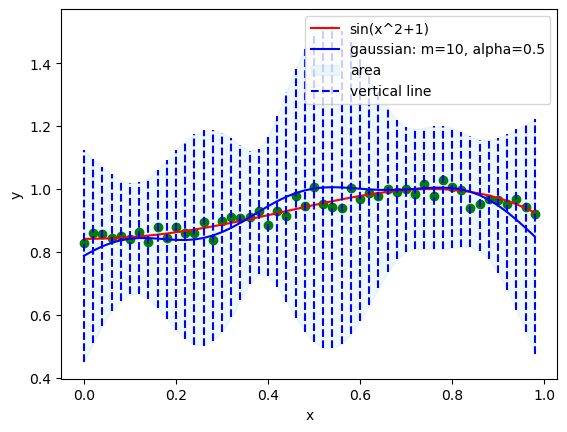

[35, 44, 41, 7, 4, 19]
6


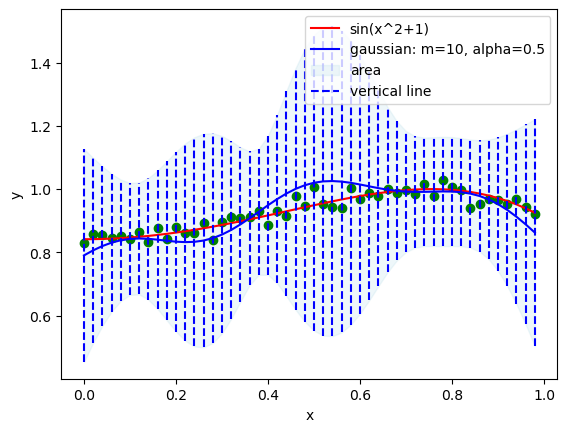

[35, 44, 41, 7, 4, 19, 38]
7


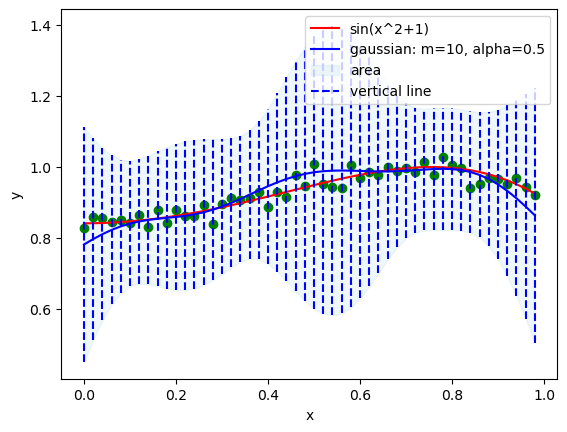

[35, 44, 41, 7, 4, 19, 38, 15]
8


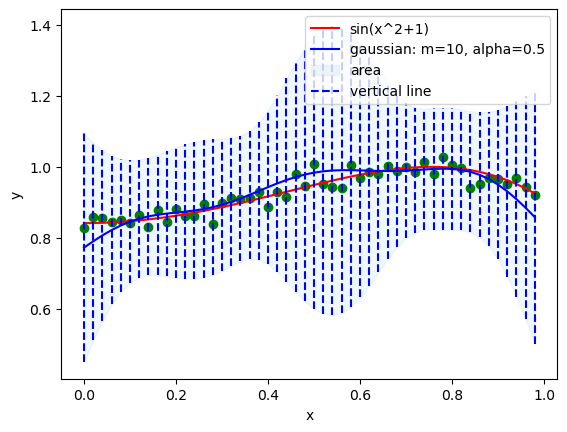

[35, 44, 41, 7, 4, 19, 38, 15, 8]
9


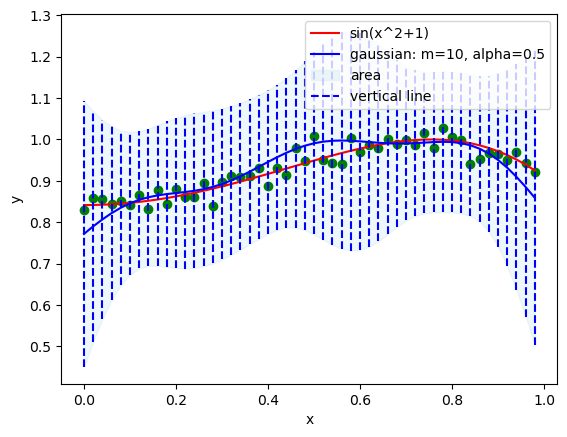

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23]
10


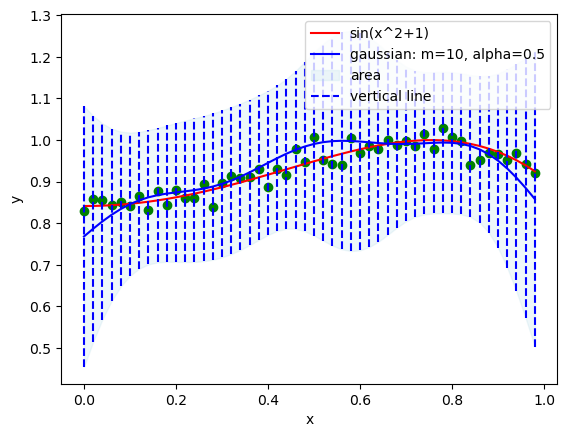

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10]
11


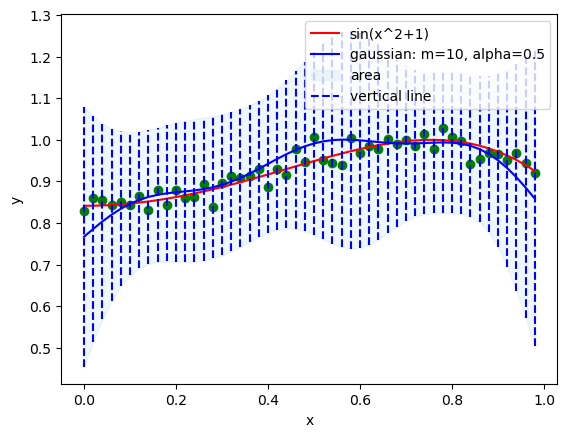

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18]
12


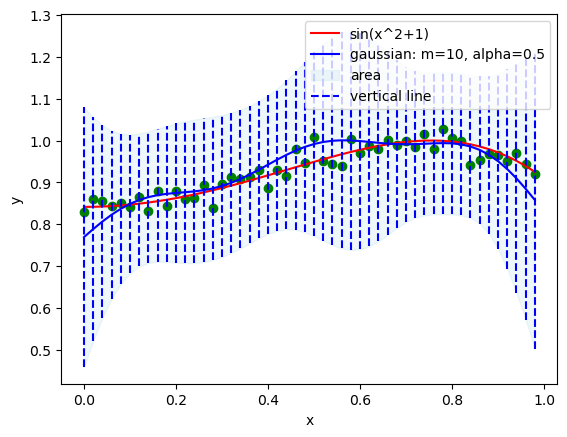

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6]
13


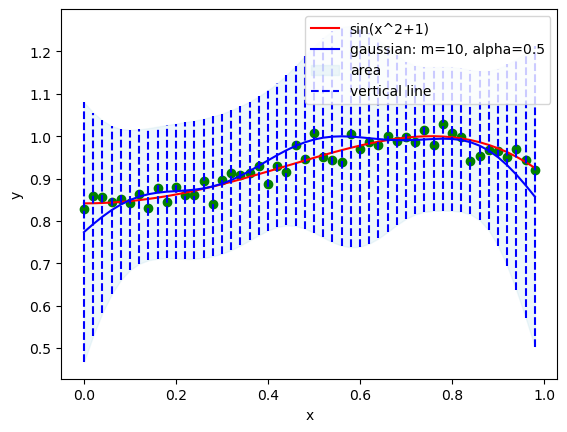

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11]
14


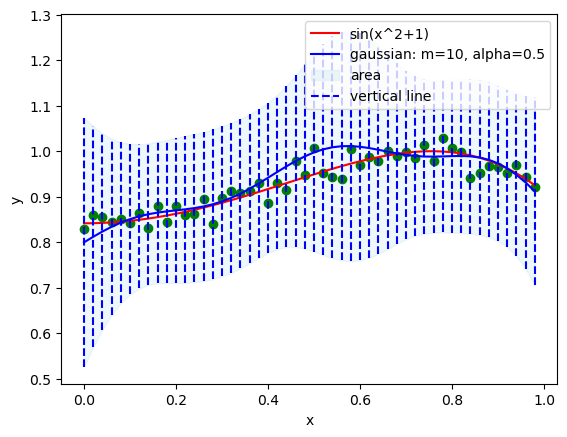

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48]
15


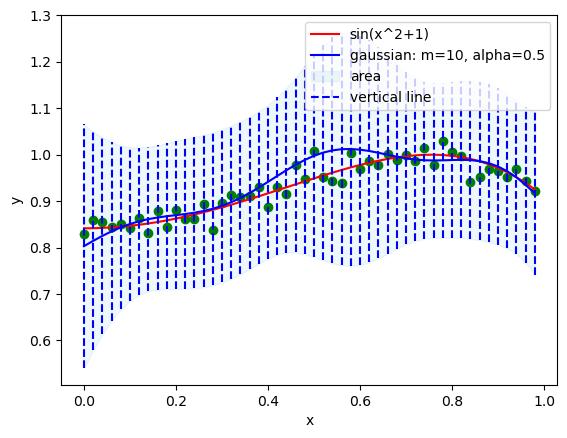

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49]
16


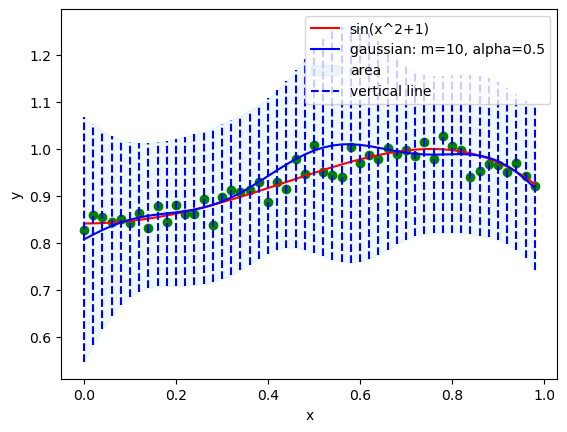

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9]
17


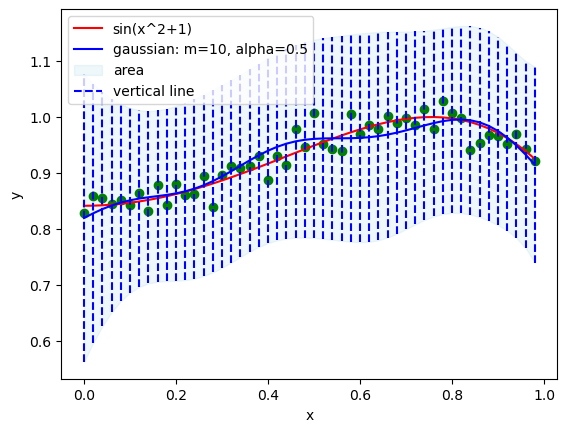

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28]
18


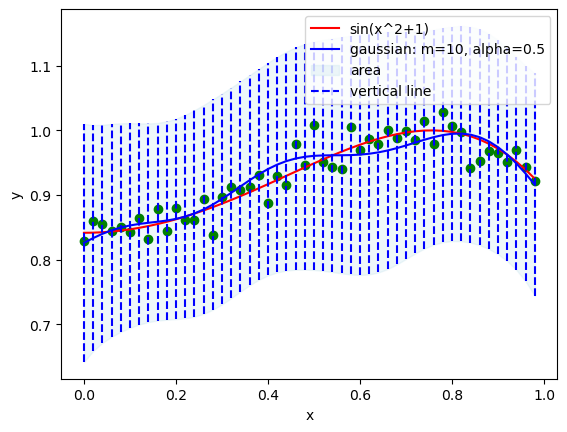

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0]
19


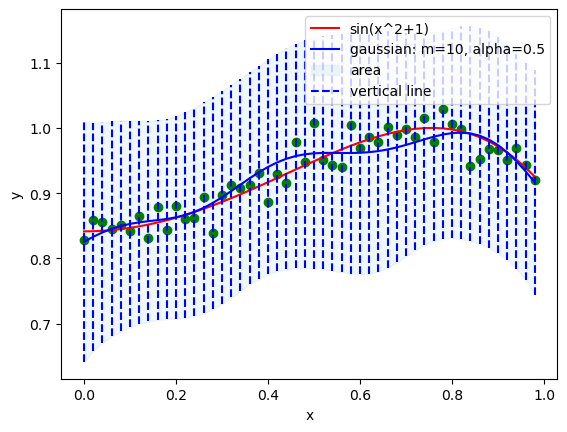

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38]
20


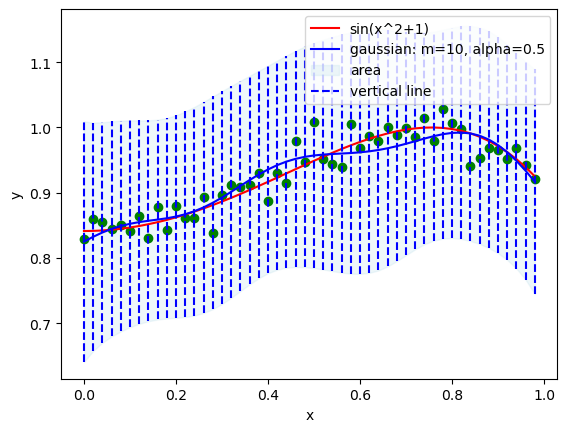

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21]
21


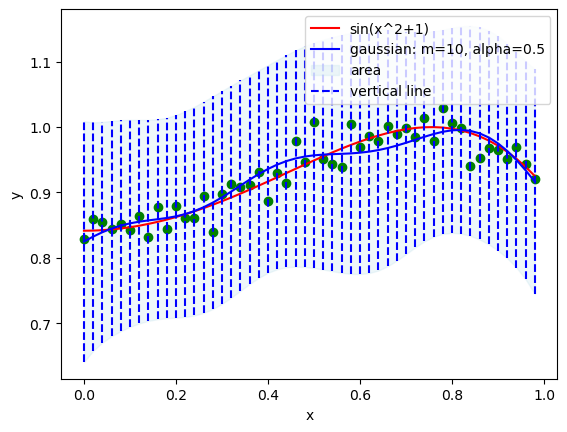

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40]
22


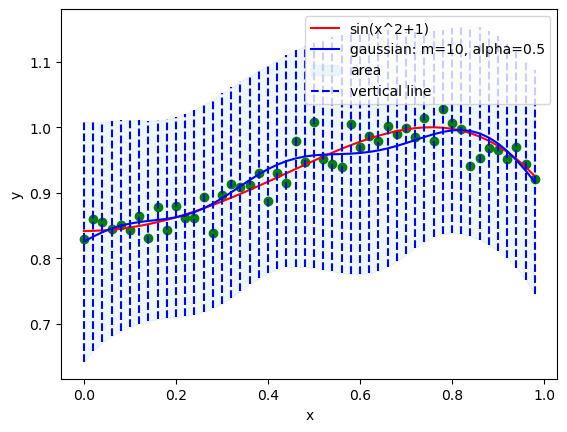

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11]
23


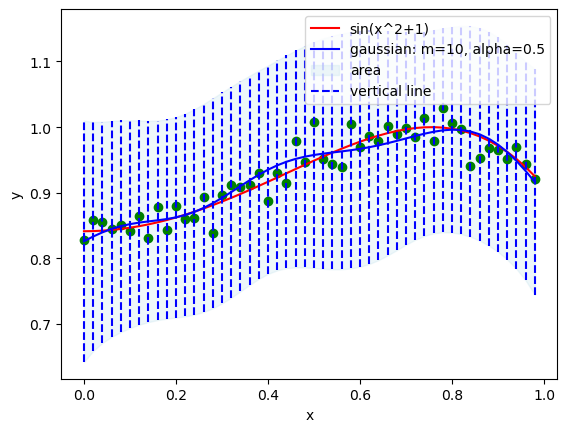

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35]
24


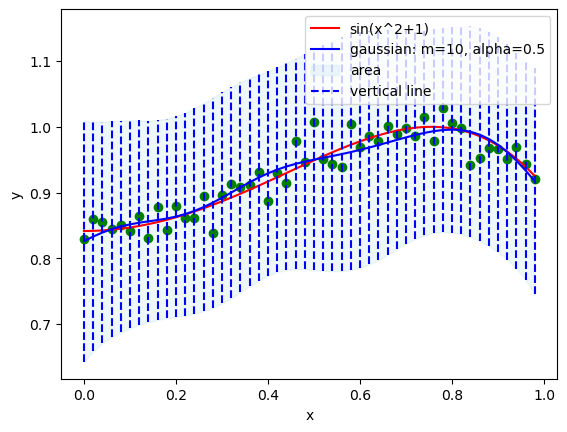

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22]
25


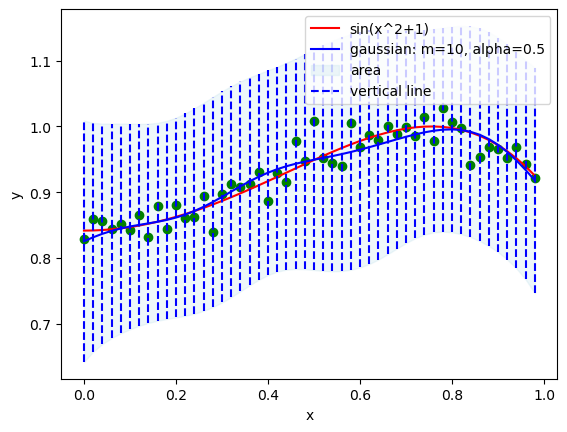

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7]
26


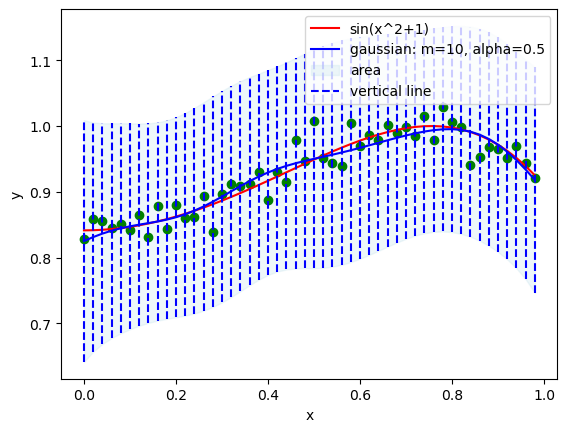

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32]
27


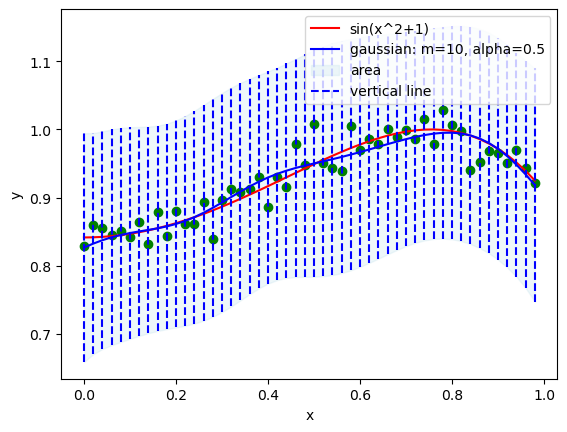

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0]
28


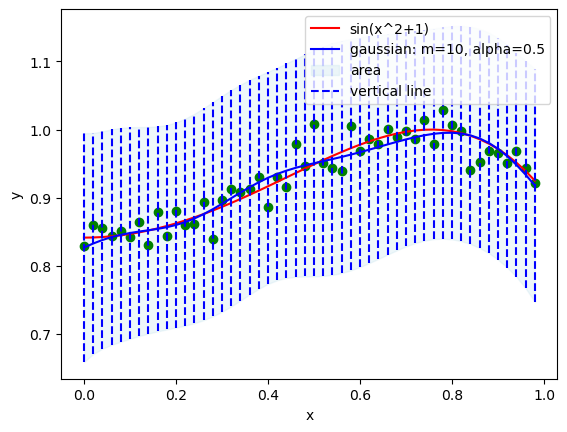

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12]
29


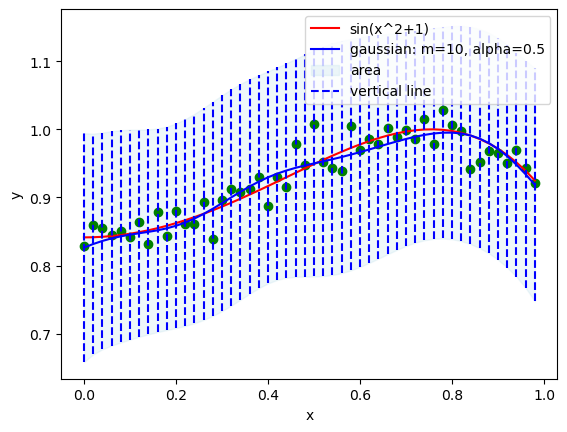

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7]
30


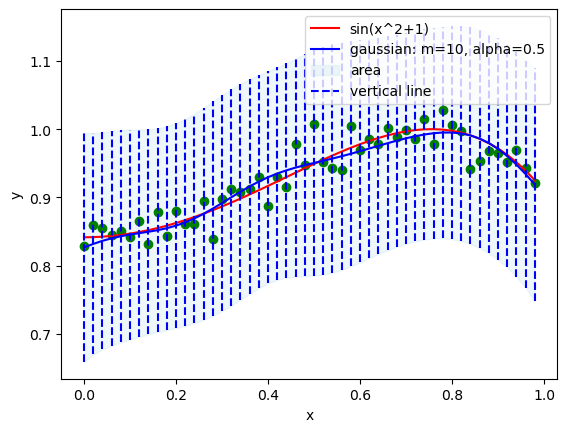

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32]
31


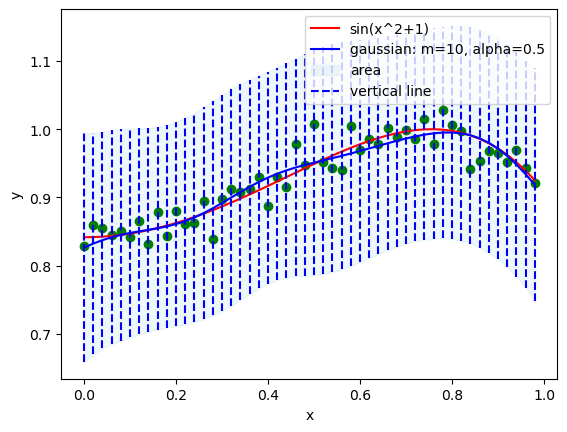

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8]
32


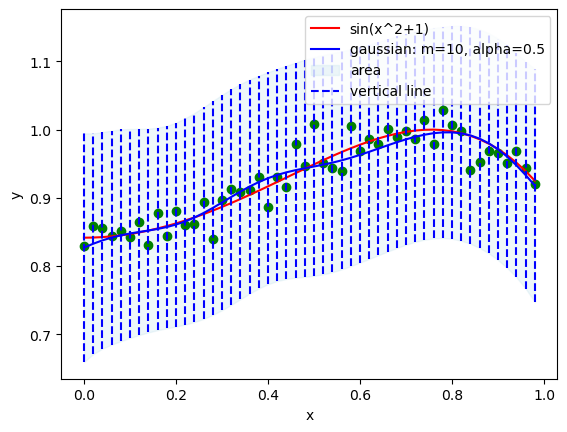

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28]
33


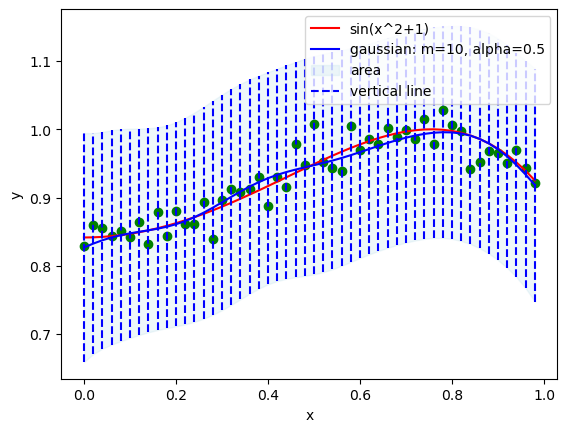

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31]
34


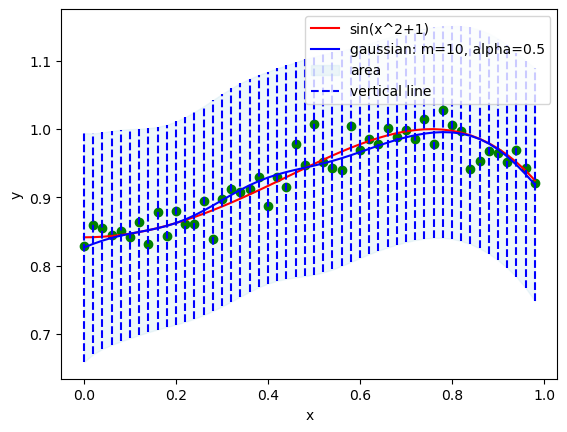

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13]
35


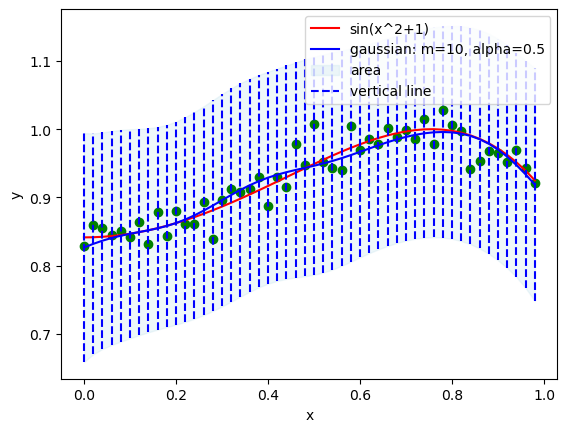

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34]
36


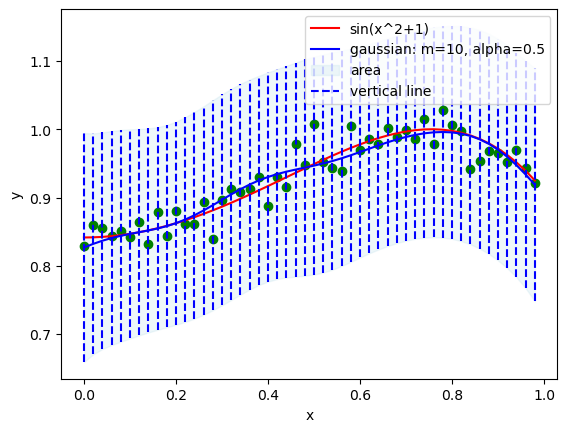

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19]
37


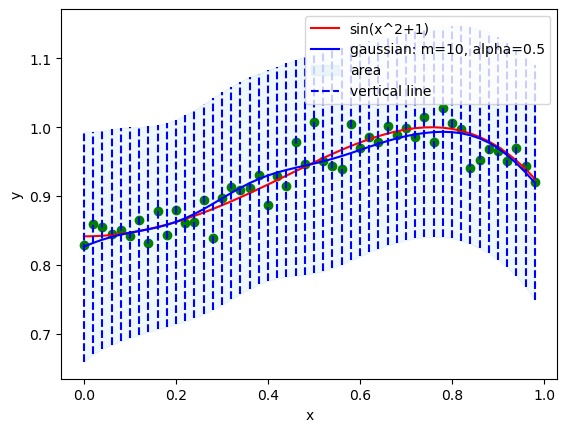

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38]
38


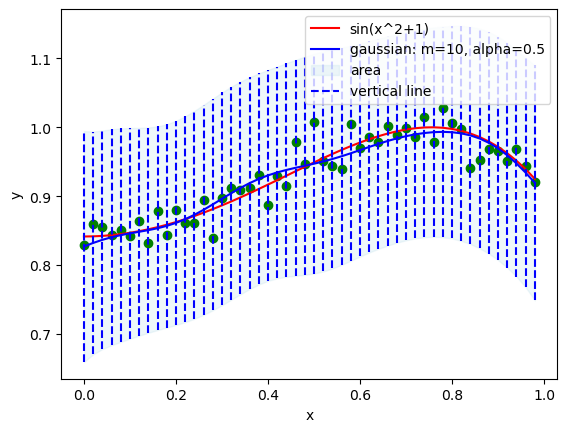

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9]
39


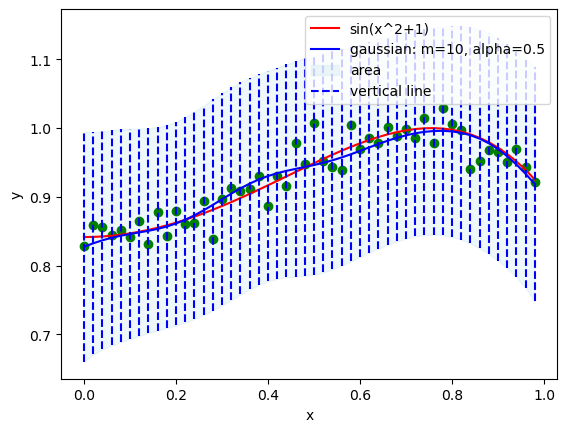

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37]
40


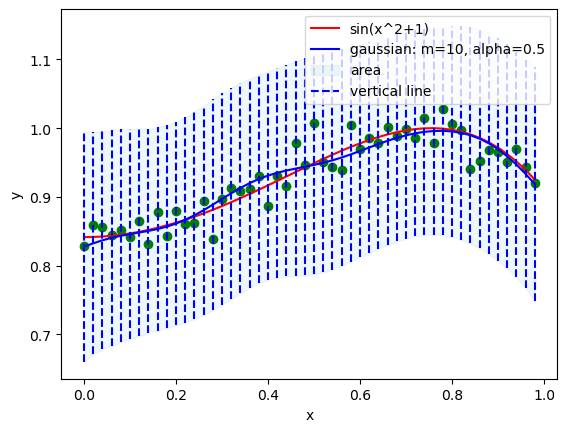

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19]
41


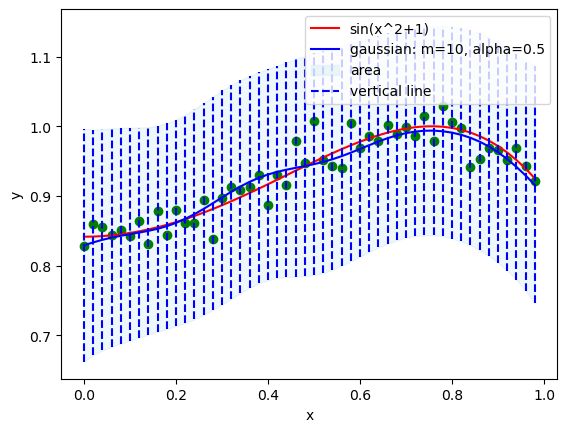

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43]
42


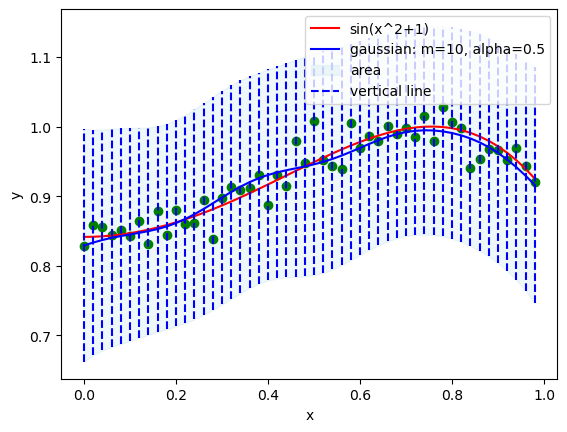

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33]
43


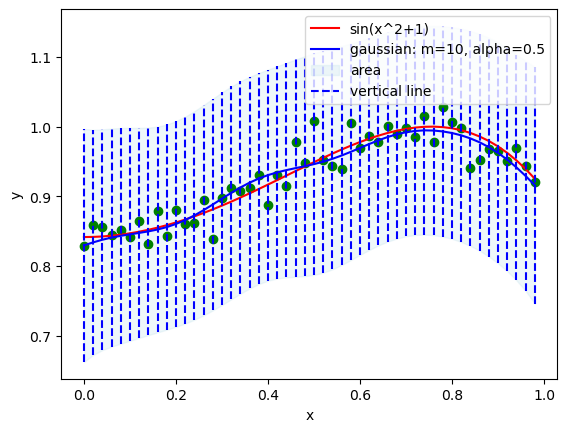

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12]
44


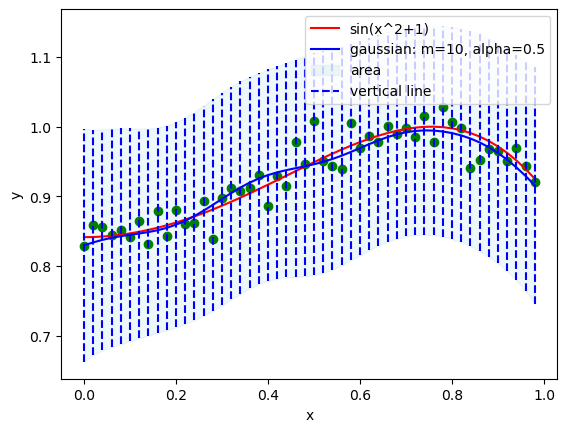

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12, 9]
45


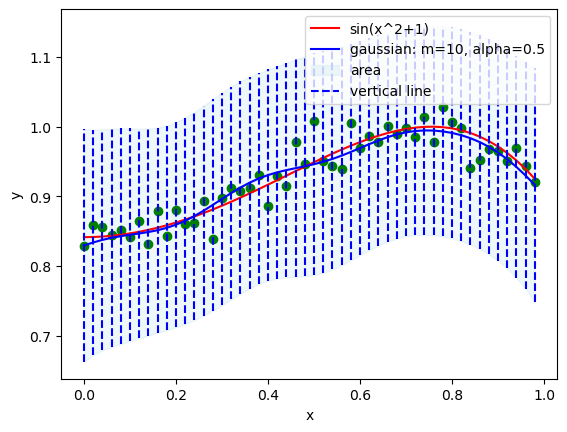

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12, 9, 45]
46


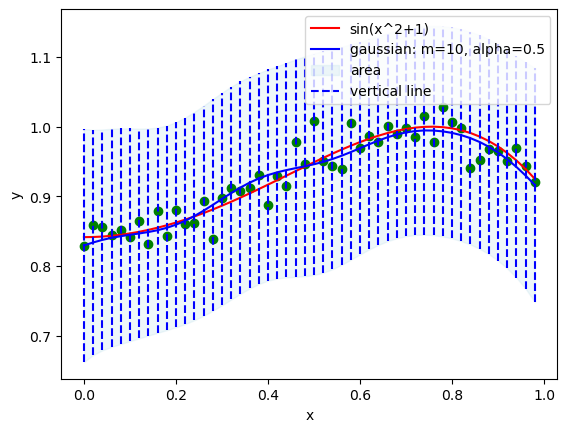

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12, 9, 45, 32]
47


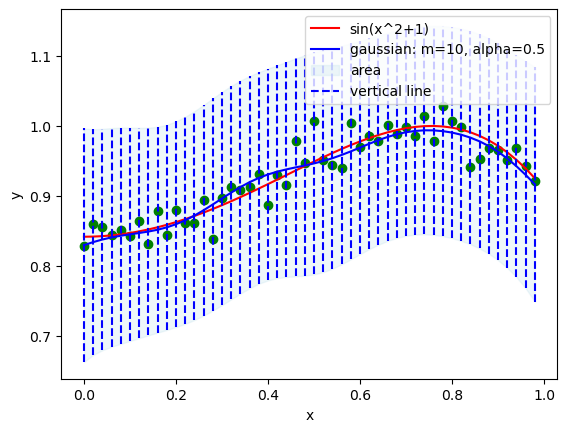

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12, 9, 45, 32, 36]
48


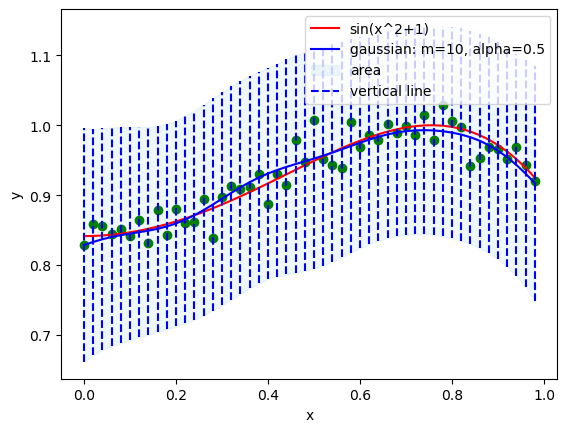

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12, 9, 45, 32, 36, 29]
49


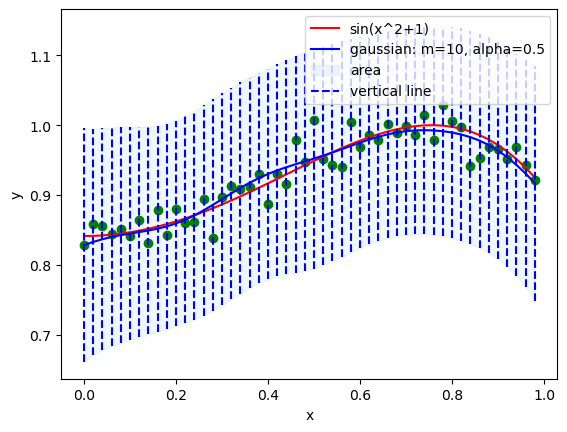

[35, 44, 41, 7, 4, 19, 38, 15, 8, 23, 10, 18, 6, 11, 48, 49, 9, 28, 0, 38, 21, 40, 11, 35, 22, 7, 32, 0, 12, 7, 32, 8, 28, 31, 13, 34, 19, 38, 9, 37, 19, 43, 33, 12, 9, 45, 32, 36, 29, 18]
50


In [21]:
def display_distribution(m, alpha, x, y_, y_origin, y_noise, area, line_name, origin_func):
    fig, ax = plt.subplots()
    line1, = ax.plot(x, y_origin, color='red', label=f'{origin_func}')
    line2, = ax.plot(x, y_, color='blue', label=f'{line_name}: m={m}, alpha={alpha}')

    # 固定置信区间的上下界
    lower_bound = -1
    upper_bound = 5

    # 使用plt.fill_between填充置信区间
    plt.fill_between(x, y_ + area, y_ - area, alpha=0.2, color='lightblue', label='area')
    plt.vlines(x, ymin=y_ - area, ymax=y_ + area, color='blue', linestyle='--', label='vertical line')

    # 在区间内添加竖线
    # plt.axvline(x.all(), color='blue', linestyle='--', label='竖线')
    ax.legend()
    # ax.set_title('Linear and Quadratic Functions')
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    plt.scatter(x, y_noise, color='green')
    plt.show()


# i_arr = []
# 
# # x, y_origin, y_noise, sub_y = get_data(nodes, mu, var, 1.0, p_1)
# _, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
# 
# for i in range(0, 50):
#     index = random.randint(0, 49)
#     i_arr.append(index)
#     # x_arr.append(x[index])
#     # y_noise_arr.append(y_noise[index])
#     w_, _, ss = full_bayesian_mine(m, alpha, x[i_arr], y_noise[i_arr], var, gaussian, 1.0)
#     y_ = X @ w_
#     var_x = []
#     for el in X:
#         var_x.append(var + el.T @ ss @ el)
# 
#     display_distribution(m, alpha, x, y_, y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
#     print(i_arr)
#     print(i + 1)

i_arr = []

# sequential learning,
_, X, _ = full_bayesian_mine(m, alpha, x, y_noise, var, gaussian, 1.0)
mn = np.zeros(m).reshape(-1, 1)
sn_1 = alpha * np.identity(m)
sn = np.linalg.inv(sn_1)
for i in range(0, 50):
    index = random.randint(0, 49)
    i_arr.append(index)
    # sequential learning
    sn_1_pre = sn_1
    sn_1 = sn_1_pre + (1 / var) * (X[index].reshape(-1, 1)) @ (X[index].reshape(1, -1))
    sn = np.linalg.inv(sn_1)
    mn = sn @ (sn_1_pre @ mn + (1 / var) * (X[index].reshape(-1, 1)) @ (y_noise[index].reshape(1, 1)))
    y_ = X @ mn
    var_x = []
    for el in X:
        var_x.append(var + el.T @ sn @ el)

    display_distribution(m, alpha, x, y_.reshape(-1), y_origin, y_noise, np.sqrt(var_x), 'gaussian', 'sin(x^2+1)')
    print(i_arr)
    print(i + 1)


8. 
When the data set is large, the prediction distribution is more helpful, because one data point is considered at a time, and the model parameters are updated after each such demonstration, and this is also in sequential learning.

Prediction distribution is also adaptive for real-time applications where data observations arrive with continuous streams, and must be predicted before all data points are seen. In this case, the appropriateness of the data is more intuitive than the original form of the full Bayesian inference.

The prediction distribution takes into account all the uncertainties about the parameters. This means that it not only considers the uncertainty of the data, but also the uncertainty of the model parameters, thus providing a more comprehensive and accurate prediction.

9.
The formula is that P(t_new|t) = p(t_new|x_new, t, x, alpha ,beta) = ∫ p(t_new|w) * p(w|t) dw

P(t_new|t) is the probability of the given t_new, indicating that the probability of the predicted t_new is.

P(w|t) is the probability of the w, and indicating that the probability of the prediction parameter w.

